##### Jupyter Notebook, Step 2 - Identify Features
- Build feature selection pipelines using at least three different techniques
- **NOTE**: these pipelines are being used for feature selection not prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from tqdm import tqdm
import pickle
from sklearn.pipeline import Pipeline

UCIsample1_clean = pickle.load( open( "UCIsample1_clean", "rb" ) )
UCIsample2_clean = pickle.load( open( "UCIsample2_clean", "rb" ) )
UCIsample3_clean = pickle.load( open( "UCIsample3_clean", "rb" ) )
DBsample1_clean = pickle.load( open( "DBsample1_clean", "rb" ) )
DBsample2_clean = pickle.load( open( "DBsample2_clean", "rb" ) )
DBsample3_clean = pickle.load( open( "DBsample3_clean", "rb" ) )

UCIsample1 = pickle.load( open( "UCIsample1", "rb" ) )
UCIsample2 = pickle.load( open( "UCIsample2", "rb" ) )
UCIsample3 = pickle.load( open( "UCIsample3", "rb" ) )
DBsample1 = pickle.load( open( "DBsample1", "rb" ) )
DBsample2 = pickle.load( open( "DBsample2", "rb" ) )
DBsample3 = pickle.load( open( "DBsample3", "rb" ) )

sample_list = [UCIsample1_clean, UCIsample2_clean, UCIsample3_clean, \
               DBsample1_clean, DBsample2_clean, DBsample3_clean]
sample_names = ['UCIsample1_clean', 'UCIsample2_clean', 'UCIsample3_clean', \
                'DBsample1_clean', 'DBsample2_clean', 'DBsample3_clean']
sample_list_noise = [UCIsample1, UCIsample2, UCIsample3, \
               DBsample1, DBsample2, DBsample3]
sample_names_noise = ['UCIsample1', 'UCIsample2', 'UCIsample3', \
                'DBsample1', 'DBsample2', 'DBsample3']

UCIsample1_clean.name = 'UCIsample1_clean'
UCIsample2_clean.name = 'UCIsample2_clean'
UCIsample3_clean.name = 'UCIsample3_clean'
DBsample1_clean.name = 'DBsample1_clean' 
DBsample2_clean.name = 'DBsample2_clean' 
DBsample3_clean.name = 'DBsample3_clean'
UCIsample1.name = 'UCIsample1'
UCIsample2.name = 'UCIsample2'
UCIsample3.name = 'UCIsample3'
DBsample1.name = 'DBsample1' 
DBsample2.name = 'DBsample2' 
DBsample3.name = 'DBsample3'

In [25]:
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

sfm = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(), threshold=0.05))])
skb = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=5))])
sp = Pipeline([
    ('feature_selection', SelectPercentile(percentile=25))])

sfm_scaled = Pipeline([
    ('scaling', StandardScaler()), ('feature_selection', SelectFromModel(LogisticRegression(), threshold=0.05))])
skb_scaled = Pipeline([
    ('scaling', StandardScaler()), ('feature_selection', SelectKBest(score_func=f_classif, k=5))])
sp_scaled = Pipeline([
    ('scaling', StandardScaler()), ('feature_selection', SelectPercentile(percentile=25))])

sfm_params = {'feature_selection__threshold':[i for i in np.linspace(.01,.1,5)]}
skb_params = {'feature_selection__k':[3,4,5,6,7,8,9,10,11,12]}
sp_params = {'feature_selection__percentile':[10,25,50,75,90]}

sfm_scaled_gs = GridSearchCV(sfm_scaled, sfm_params, cv=2)
skb_scaled_gs = GridSearchCV(skb_scaled, skb_params, cv=2)
sp_scaled_gs = GridSearchCV(sp_scaled, sp_params, cv=2)

def fit_sample_model(sample, model):
    y = sample.iloc[:,-1]
    X = sample.iloc[:,0:-1]
    return model.fit(X, y), np.where(model.named_steps['feature_selection'].get_support())[0]

In [26]:
a1, db1 = fit_sample_model(DBsample1_clean, skb_scaled)
a2, db2 = fit_sample_model(DBsample2_clean, skb_scaled)
a3, db3 = fit_sample_model(DBsample3_clean, skb_scaled)
a11, uci1 = fit_sample_model(UCIsample1_clean, skb_scaled)
a22, uci2 = fit_sample_model(UCIsample2_clean, skb_scaled)
a33, uci3 = fit_sample_model(UCIsample3_clean, skb_scaled)

skb_DB_union = list(set(db1) | set(db2) | set(db3))
skb_UCI_union = list(set(uci1) | set(uci2) | set(uci3))

display('DB SKB features',skb_DB_union)
display('UCI SKB features',skb_UCI_union)

'DB SKB features'

[1, 5, 10, 11, 14, 15, 16, 18]

'UCI SKB features'

[2, 3, 4, 6, 9, 10, 13, 15, 18, 19]

In [27]:
# an example pvalue chart is shown below for UCI

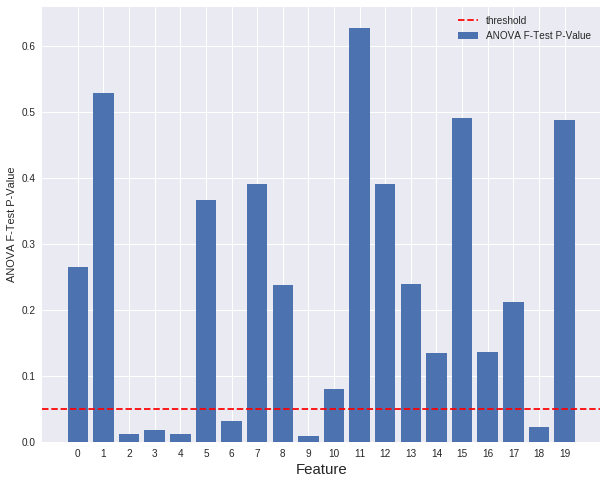

In [28]:
pvals = list(a33.named_steps['feature_selection'].pvalues_)
pvals.sort()
line_loc = 0.05

plt.figure(figsize=(10,8))
plt.bar(range(0,20), a33.named_steps['feature_selection'].pvalues_, label = 'ANOVA F-Test P-Value')
plt.axhline(line_loc, c='r', ls = '--', label = 'threshold')
plt.xticks(range(0,20))
plt.xlabel('Feature', fontsize=15)
plt.ylabel('ANOVA F-Test P-Value')
plt.legend()
plt.show()

In [29]:
a1, db1 = fit_sample_model(DBsample1_clean, sp_scaled)
a2, db2 = fit_sample_model(DBsample2_clean, sp_scaled)
a3, db3 = fit_sample_model(DBsample3_clean, sp_scaled)
a11, uci1 = fit_sample_model(UCIsample1_clean, sp_scaled)
a22, uci2 = fit_sample_model(UCIsample2_clean, sp_scaled)
a33, uci3 = fit_sample_model(UCIsample3_clean, sp_scaled)

sp_DB_union = list(set(db1) | set(db2) | set(db3))
sp_UCI_union = list(set(uci1) | set(uci2) | set(uci3))

display('DB SP features',sp_DB_union)
display('UCI SP features',sp_UCI_union)

'DB SP features'

[1, 5, 10, 11, 14, 15, 16, 18]

'UCI SP features'

[2, 3, 4, 6, 9, 10, 13, 15, 18, 19]

In [30]:
a1, db1 = fit_sample_model(DBsample1_clean, sfm_scaled)
a2, db2 = fit_sample_model(DBsample2_clean, sfm_scaled)
a3, db3 = fit_sample_model(DBsample3_clean, sfm_scaled)
a11, uci1 = fit_sample_model(UCIsample1_clean, sfm_scaled)
a22, uci2 = fit_sample_model(UCIsample2_clean, sfm_scaled)
a33, uci3 = fit_sample_model(UCIsample3_clean, sfm_scaled)

sfm_DB_union = list(set(db1) | set(db2) | set(db3))
sfm_UCI_union = list(set(uci1) | set(uci2) | set(uci3))

display('DB SFM features',sfm_DB_union)
display('UCI SFM features',sfm_UCI_union)

'DB SFM features'

[]

'UCI SFM features'

[]

In [9]:
# Final lists: database.  An exclusive list still hasn't selected down to 5 features, but SFM didn't provide much 
# help.  Overall, SelectPercentile and SelectKBest were the most consistent.

display((sfm_DB_union), (sp_DB_union), (skb_DB_union))

list(set(sfm_DB_union) & set(sp_DB_union) & set(skb_DB_union))

[]

[1, 5, 10, 11, 14, 15, 16, 18]

[1, 5, 10, 11, 14, 15, 16, 18]

[]

In [10]:
# Final lists: UCI.  An inclusive list selected almost all 20 features, making it essentially worthless, so I opted
# for an exclusive list of features that appeared in all 3 models.  Overall, SelectPercentile and SelectKBest
# seemed to be the most consistent and useful in feature reduction.

display((sfm_UCI_union), (sp_UCI_union), (skb_UCI_union))

list(set(sfm_UCI_union) & set(sp_UCI_union) & set(skb_UCI_union))

[]

[2, 3, 4, 6, 9, 10, 13, 15, 18, 19]

[2, 3, 4, 6, 9, 10, 13, 15, 18, 19]

[]

In [11]:
DB_features = list(set(sfm_DB_union) & set(sp_DB_union) & set(skb_DB_union))
UCI_features = list(set(sfm_UCI_union) & set(sp_UCI_union) & set(skb_UCI_union))

pickle.dump(DB_features, open('DB_features', "wb" ) )
pickle.dump(UCI_features, open('UCI_features', "wb" ) )

In [12]:
# As expected, these selected features show little correlation with one another.  Two example plots demonstrating this
# are reproduced below.

ValueError: zero-size array to reduction operation minimum which has no identity

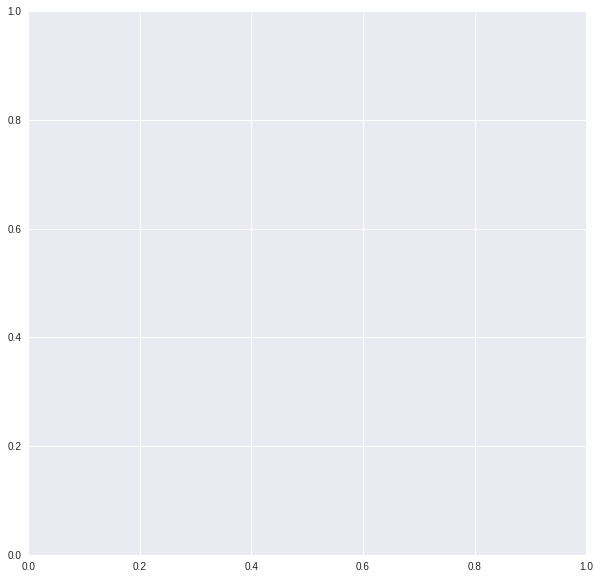

In [13]:
corr = UCIsample3[UCI_features].corr()
# corr = UCIsample3_clean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
plt.subplots(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

In [ ]:
corr = DBsample1[DB_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
plt.subplots(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')


In [14]:
# doing PCA as an alternate feature selection method
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

def fit_sample_model(sample, model):
    y = sample.iloc[:,-1]
    X = sample.iloc[:,0:-1]
    model.fit(X)
    X_pca = pca.fit_transform(X)
    return model.fit(X), X.shape, X_pca.shape, X_pca

In [15]:
fit_sample_model(UCIsample1_clean, pca)

(PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
   svd_solver='auto', tol=0.0, whiten=False),
 (200, 20),
 (200, 20),
 array([[ -7.48860579e+01,   7.88670979e+01,  -2.68584805e+02, ...,
           4.89043076e-02,   1.19711964e+00,  -1.78358036e-01],
        [ -4.46966035e+01,   2.12098739e+02,   1.60899262e+02, ...,
           2.04718107e+00,   8.79344214e-01,  -2.14517066e-01],
        [ -1.89053938e+02,  -1.83955095e+02,  -2.72685277e+02, ...,
          -1.78897344e+00,   1.43277493e+00,   2.37725798e-01],
        ..., 
        [ -3.50847819e+02,   1.26864464e+02,  -6.65340099e+01, ...,
          -1.61011860e+00,  -3.39473929e+00,   4.04017956e-01],
        [ -6.34489015e+01,   2.49091032e+02,   4.33838825e+01, ...,
           5.42519209e-01,  -4.82892508e-01,   5.93380625e-01],
        [  1.06041793e+02,   1.10871807e+02,   1.10573605e+02, ...,
           2.01045981e+00,  -1.35823528e+00,  -1.25407764e+00]]))

In [16]:
exp_var = pca.explained_variance_ratio_
exp_var

array([  3.89023242e-01,   3.23458296e-01,   1.67683820e-01,
         7.32623390e-02,   4.03068867e-02,   1.21521821e-03,
         1.02164664e-03,   7.00222558e-04,   6.45821521e-04,
         5.77057803e-04,   4.77836413e-04,   4.40713477e-04,
         3.97407263e-04,   2.45831477e-04,   1.87882616e-04,
         1.70780955e-04,   1.38813834e-04,   2.54077082e-05,
         1.34768571e-05,   7.29805106e-06])

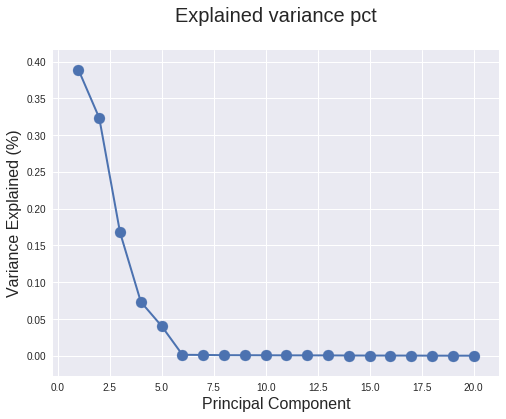

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, len(exp_var)+1), exp_var, lw=2)
ax.scatter(range(1, len(exp_var)+1), exp_var, s=120)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

In [18]:
# um, this is much better.  using this instead!!!